In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
var_jinny = pd.read_csv('/Users/jinny/Documents/touristcast/VAR/CV/VAR_CVL-IDF-NAQ-ARA-PAC_lags-1-15.csv', index_col=0)
var_jinny.drop_duplicates(inplace=True)
var_franck = pd.read_csv('/Users/jinny/Documents/touristcast/VAR/CV/VAR_PDL_BRE_OCC_COR_lags-1-15.csv', index_col=0)
var_sekou = pd.read_csv('/Users/jinny/Documents/touristcast/VAR/CV/VAR_BFC-NOR-HDF-GES_lags-1-15.csv', index_col=0)
var_results = pd.concat([var_jinny, var_franck, var_sekou])

In [3]:
var_results.head()

,region,with_gdp,trend_model,lag,periods,MAE,RMSE,Max_error,MASE
0,CVL,False,Holt,1,2,19.459244,22.574895,0.050039,10.312488
1,CVL,False,Holt,1,3,16.201462,20.233335,0.065724,8.006179
2,CVL,False,Holt,1,4,17.663471,21.240537,0.063741,9.983321
3,CVL,False,Holt,1,5,18.481146,21.201737,0.054728,9.225412
4,CVL,False,Holt,1,6,12.407041,15.744161,0.044017,15.524584


### Final VAR models for each region
- Based on performance with training data at 6 periods
- No GDP included
- Minimum MASE for each region

In [7]:
final_models = var_results[(var_results.periods==6)&(var_results.with_gdp==False)].sort_values('MASE', ascending=True).groupby('region', as_index=False).first()
final_models

,region,with_gdp,trend_model,lag,periods,MAE,RMSE,Max_error,MASE
0,ARA,False,ARIMA,12,6,63.286742,80.472928,0.062823,3.775090
1,BFC,False,ARIMA,13,6,39.476622,51.865493,0.112871,11.881471
2,BRE,False,ARIMA,14,6,792.522575,1045.333759,2.921451,11.827544
3,COR,False,Holt,1,6,14.002876,17.782025,0.048802,19.701594
4,CVL,False,ARIMA,1,6,13.234664,16.714164,0.043430,15.379914
5,GES,False,ARIMA,10,6,53.456918,56.764360,0.064634,10.929462
6,HDF,False,ARIMA,13,6,33.738146,41.164526,0.082961,7.380053
7,IDF,False,ARIMA,15,6,1576.923387,1893.730052,0.662676,0.910769
8,NAQ,False,ARIMA,14,6,94.397231,112.186703,0.101138,14.136005
9,NOR,False,ARIMA,15,6,53.943097,65.530187,0.141939,8.435698


### Percentage of max error on 2017 forecast
- With chosen models above using 6 periods of training data
- Most are within 4% to 10% of error (90-95% accuracy)
- Certain regions have huge exceptions for 2017 forecast performance (BRE, IDF, OCC)

In [8]:
(100 * final_models.Max_error).round(2).astype(str) + '%'

0        6.28%
1       11.29%
2      292.15%
3        4.88%
4        4.34%
5        6.46%
6         8.3%
7       66.27%
8       10.11%
9       14.19%
10    53027.3%
11      12.81%
12       8.45%
Name: Max_error, dtype: object

In [9]:
final_models.loc[final_models.MASE.idxmin()]

region              IDF
with_gdp          False
trend_model       ARIMA
lag                  15
periods               6
MAE             1576.92
RMSE            1893.73
Max_error      0.662676
MASE           0.910769
Name: 7, dtype: object

In [10]:
final_models.loc[final_models.MASE.idxmax()]

region               COR
with_gdp           False
trend_model         Holt
lag                    1
periods                6
MAE              14.0029
RMSE              17.782
Max_error      0.0488021
MASE             19.7016
Name: 3, dtype: object

In [11]:
# final_models.to_csv('VAR_final-models.csv')

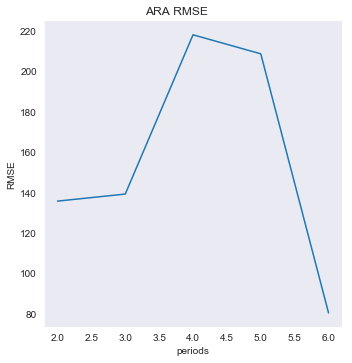

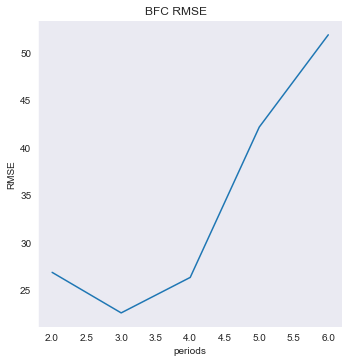

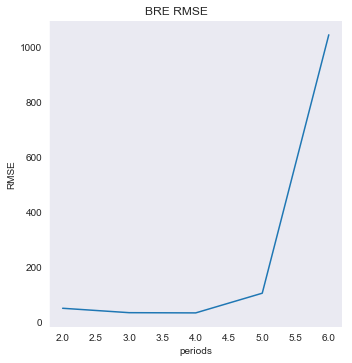

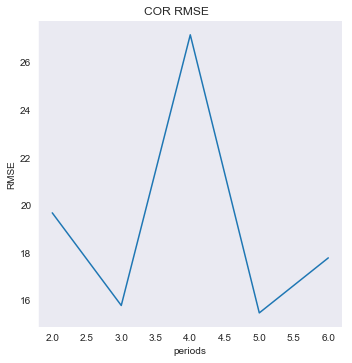

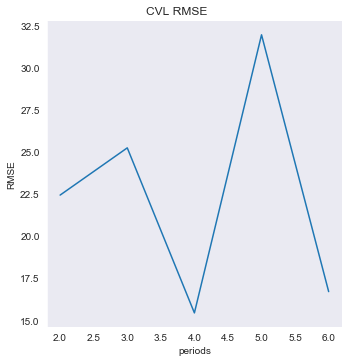

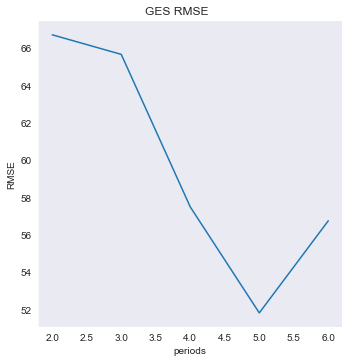

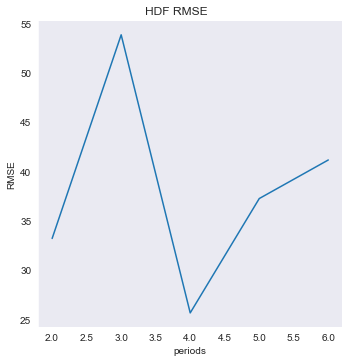

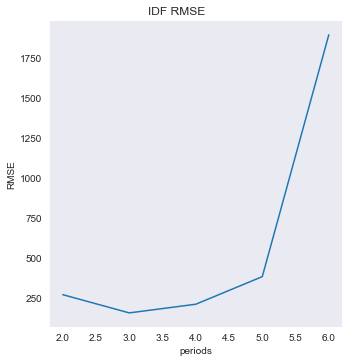

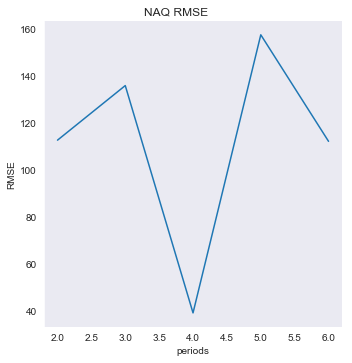

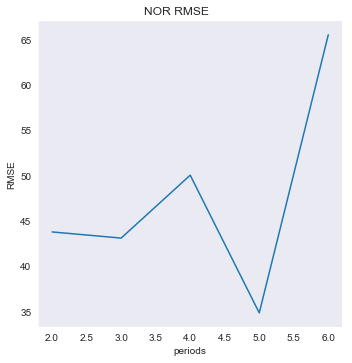

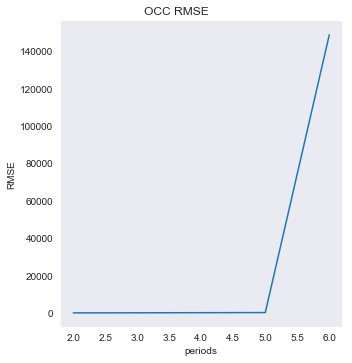

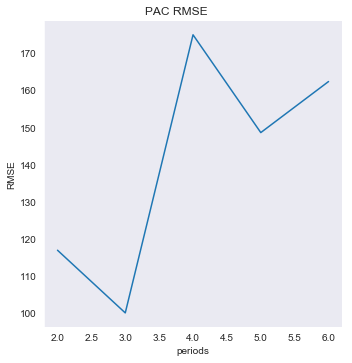

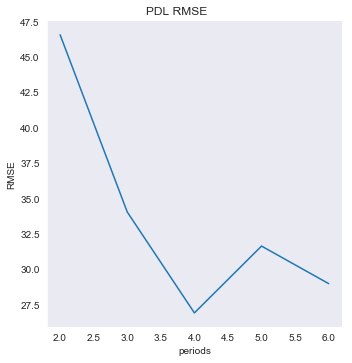

In [19]:
for index, row in final_models.iterrows():
    rmse_curve = sns.relplot(x='periods', y='RMSE',
            kind='line', legend='full',
            data=var_results.query(f"region == '{row.region}' and with_gdp == False and trend_model == '{row.trend_model}' and lag == '{row.lag}'"))
    rmse_curve.fig.suptitle(f'{row.region} RMSE', y=1, fontsize=12)

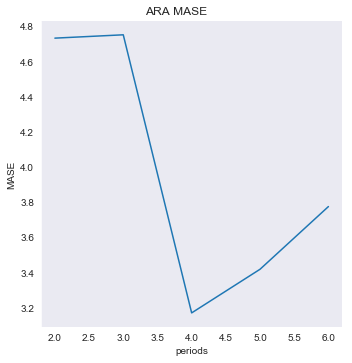

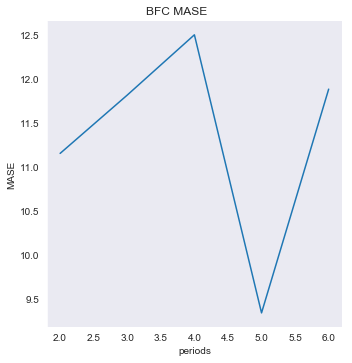

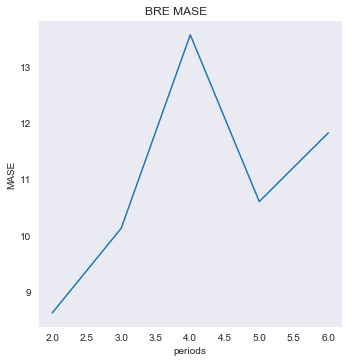

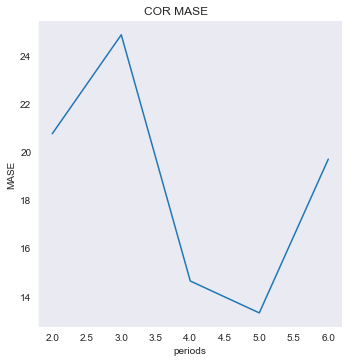

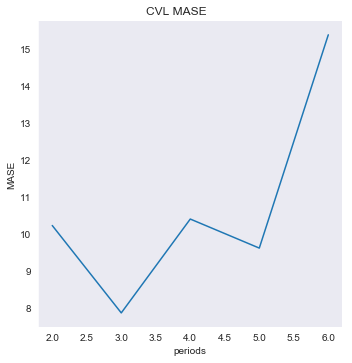

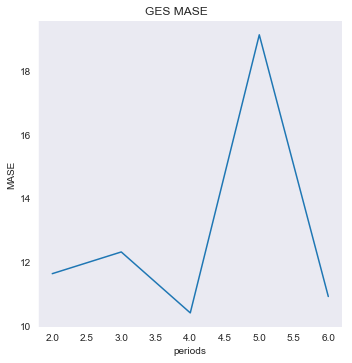

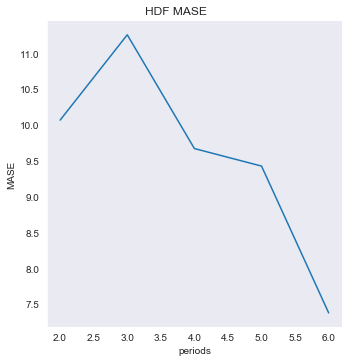

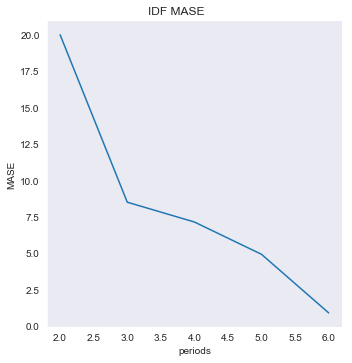

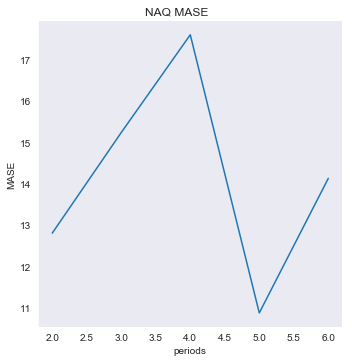

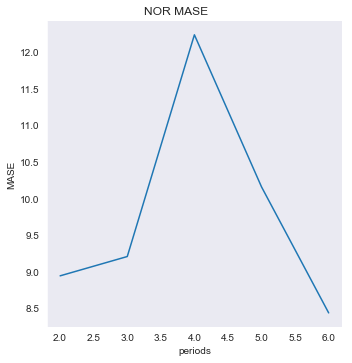

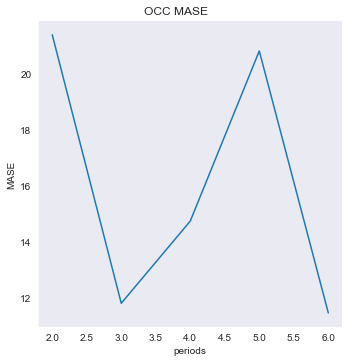

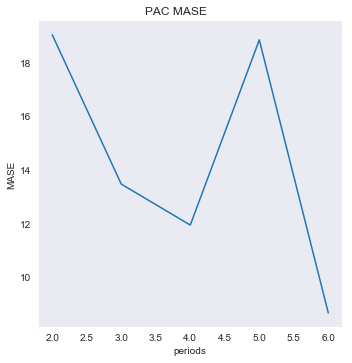

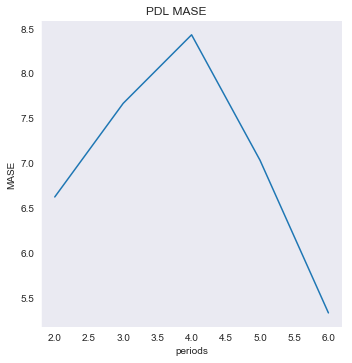

In [20]:
for index, row in final_models.iterrows():
    mase_curve = sns.relplot(x='periods', y='MASE',
            kind='line', legend='full',
            data=var_results.query(f"region == '{row.region}' and with_gdp == False and trend_model == '{row.trend_model}' and lag == '{row.lag}'"))
    mase_curve.fig.suptitle(f'{row.region} MASE', y=1, fontsize=12)